<h3>Looking into relationship between inactive rate, Household income, and health issue </h3>
<h4>Hypothesis:</h4>
<ul>
    <li>The higher of the average household income means the wealthier of state => more time for
   outdoor activities and healthier diet</li>

</ul>

<h4>Test area</h4>
<ul>
    <li>USA - the habit in each states is very different</li>
</ul>

In [1]:
import pandas
import matplotlib
%matplotlib inline

<h3>Data Exploration</h3>
- CDC (Center of Disease Control and Prevention)
- Wikipedia
- http://stateofobesity.org

In [23]:
US_loc = pandas.read_csv('2ndTry/Lat_Long.csv')
US_inactiveRate = pandas.read_csv('2ndTry/US_inactive_rate.csv');
US_obesity = pandas.read_csv('2ndTry/US_obesity_rate.csv');
US_hypertension = pandas.read_csv('2ndTry/US_hypertension.csv');
data2015 = pandas.read_csv('2ndTry/US_general_info_2015.csv');
US_diabete = pandas.read_csv('2ndTry/US_diabete.csv');


In [26]:
US_loc.columns

Index([u'States', u'Latitude', u'Longitude', u'Unnamed: 3', u'Unnamed: 4'], dtype='object')

In [29]:
data2015['obesity_rate'] = US_obesity['2015']
data2015['hypertension'] = US_hypertension['2015']
data2015['inactive_rate'] = US_inactiveRate['2015']
data2015['diabete'] = US_diabete['2015']
data2015['lat'] = US_loc["Latitude"]
data2015['long'] = US_loc["Longitude"]

In [30]:
data2015

,States,Average Income,Fruits Consumption,Vegetable Consumption,McDonalds,obesity_rate,hypertension,inactive_rate,diabete,lat,long
0,Alabama,41.42,43.8,24.3,5.8,35.6,40.4,31.9,13.5,32.806671,-86.791130
1,Arizona,46.71,38.0,20.6,4.3,28.4,30.8,24.7,10.1,33.729759,-111.431221
2,Arkansas,38.76,47.5,28.6,6.2,34.5,39.3,34.2,12.6,34.969704,-92.373123
3,California,67.46,30.4,16.5,3.8,24.2,28.5,20.0,10.0,36.116203,-119.681564
4,Colorado,55.39,35.7,19.1,4.4,20.2,25.7,17.9,6.8,39.059811,-105.311104
5,Connecticut,65.75,32.0,20.6,4.4,25.3,30.4,23.5,9.3,41.597782,-72.755371
6,Delaware,57.96,39.2,23.8,4.7,29.7,34.5,29.4,11.5,39.318523,-75.507141
7,District of Columbia,65.12,31.7,20.1,5.0,22.1,29.4,19.4,8.5,38.897438,-77.026817
8,Florida,44.30,37.7,22.6,5.1,26.8,33.5,26.2,11.3,27.766279,-81.686783
9,Georgia,46.01,41.9,23.2,4.6,30.7,36.2,27.3,11.3,33.040619,-83.643074


In [134]:
import seaborn

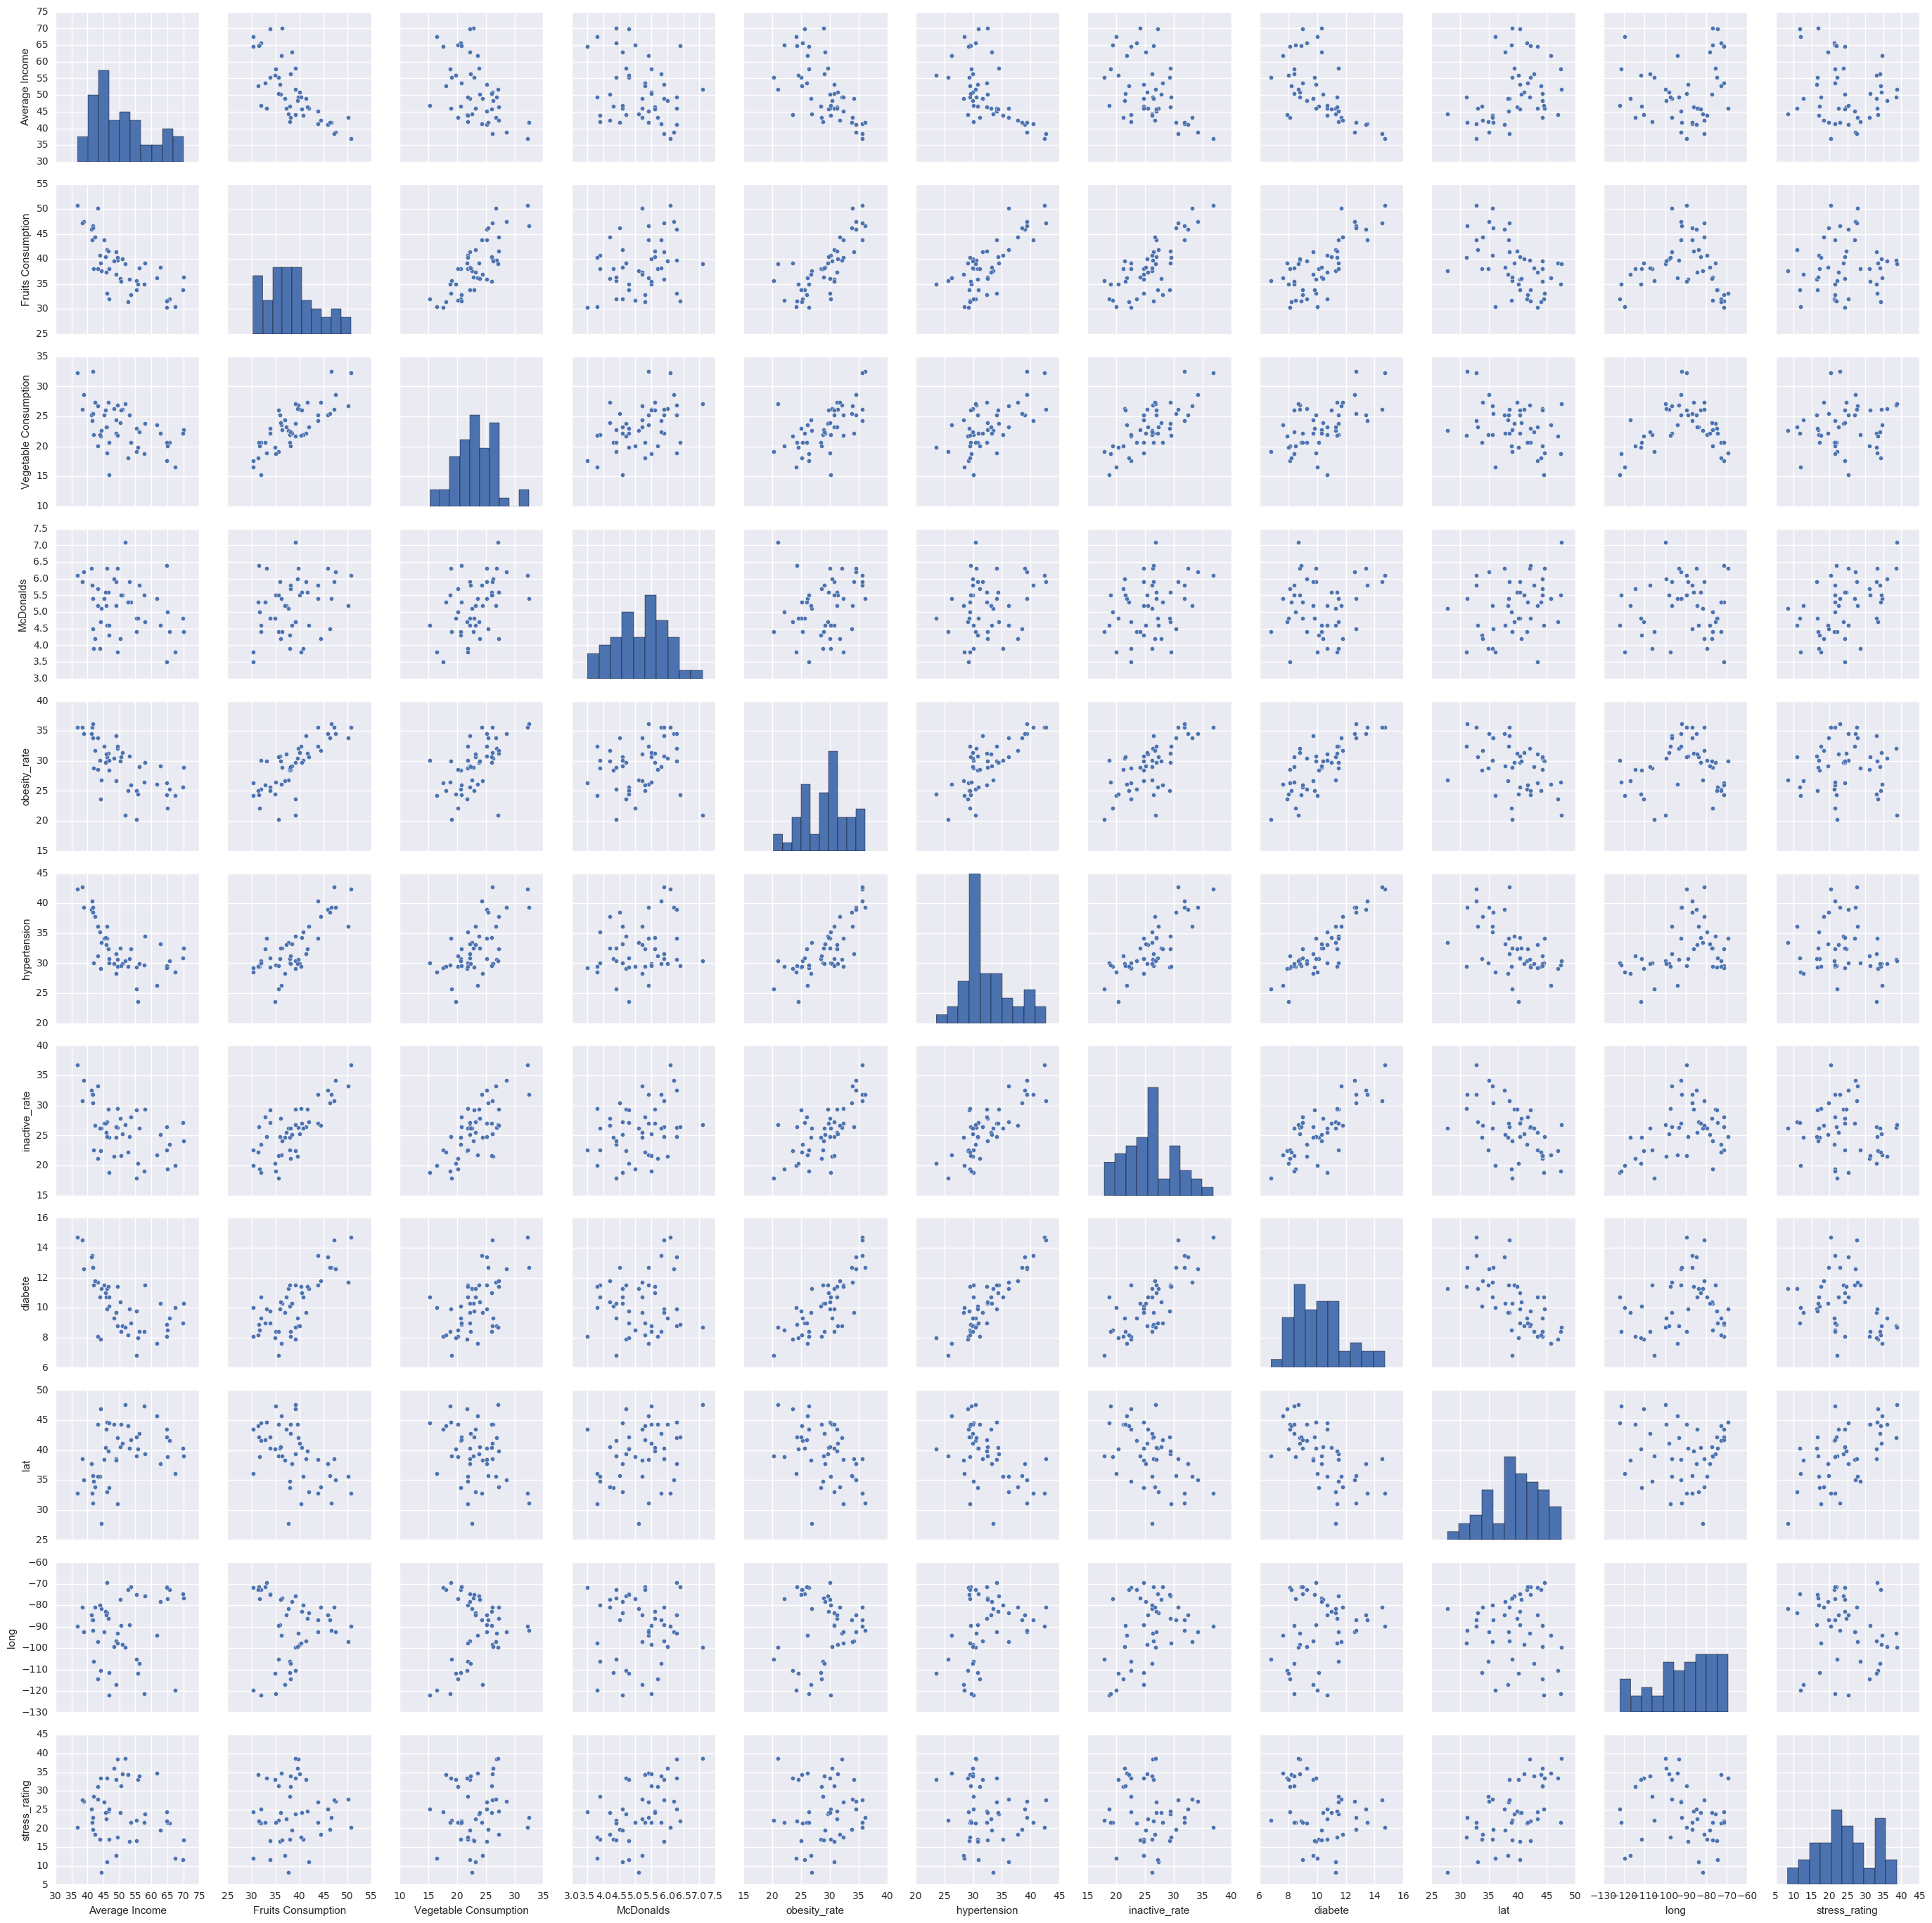

In [135]:
seaborn.pairplot(data2015)

In [32]:
import sklearn.linear_model

In [35]:
data2015.set_index('States')
data2015.columns

Index([u'States', u'Average Income', u'Fruits Consumption',
       u'Vegetable Consumption', u'McDonalds', u'obesity_rate',
       u'hypertension', u'inactive_rate', u'diabete', u'lat', u'long'],
      dtype='object')

In [38]:
ransac = sklearn.linear_model.RANSACRegressor()
X = data2015[ ['Average Income', 'inactive_rate', 'Fruits Consumption', 'Vegetable Consumption', 'McDonalds'] ]
y = data2015.obesity_rate

In [39]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [41]:
ransac.estimator_.coef_

array([-0.01694941,  0.29847229,  0.51940934, -0.13910567,  0.30312302])

<h4>Learning for Obesity rate</h4>
<ul>
<li>The higher the average income is, the lower the obesity rate.  Although the coef is very small that mean it's not a big contributor which prove that my assumption was wrong</li>
<li>As inactive rate increase, obesity rate also increase.  Again, the number is not that high</li>
<li>As the number of people eat less than 1 serving of fruit increase, the obesity rate also increase</li>
<li>As the number of people eat less than 1 serving of veggie increase, the obesity rate decrease. This doesn't make sense as I would assume it would be the same as fruit consumption.  I guess potatoe also count as veggie?</li>
<li>The more McDonalds there is, the higher the obesity rate</li>
</ul>

In [42]:
ols = sklearn.linear_model.LinearRegression()

In [48]:
X = data2015[ ['Average Income', 'inactive_rate', 'Fruits Consumption', 'Vegetable Consumption', 'McDonalds'] ]
y = data2015.diabete
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
ols.coef_

array([-0.04725398,  0.26151605,  0.09681836, -0.06806865, -0.41918869])

<h4>Learning for Diabete</h4>
<ul>
<li>The higher the average income is, the lower the state diabete rate.  But again, it's not a bit contributor</li>
<li>As inactive rate increase, diabete rate also increase.</li>
<li>The number of people eating fruits and veggie seems to have less contribute to the states diabete rate</li>
<li>The more McDonalds there is, the lower of the diabete rate.  WHAT?!</li>
</ul>

In [50]:
ransac2 = sklearn.linear_model.RANSACRegressor()
X = data2015[ ['Average Income', 'inactive_rate', 'Fruits Consumption', 'Vegetable Consumption', 'McDonalds'] ]
y = data2015.hypertension

In [51]:
ransac2.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [52]:
ransac2.estimator_.coef_

array([-0.06829731,  0.94769787,  0.47546309, -0.9095819 , -0.44819827])

<h4>Learning for Hypertension rate</h4>
<ul>
<li>Physical inactivites definitely can contribute to hypertension.  The higher inactive rate is, the higher of the hypertension rate</li>
<li>As the number of people who eats less veggie increase, hypertension rate decrease. The less veggie you eat, the smaller the hypertension rate?</li>
</ul>

<h3>First Conclusion</h3>
- Income has no correlation at all to obesity, diabete, and hypertension rate.  
- McDonald's has little to contribute in diabete rate and hypertension rate

<h4>New Hypnothesis</h4>
- My assumption before assume that if people are wealthy, they will be happier and become more active.  
- Since the assumption was wrong (proven by data), my next "unhappy" factor guess is stress.  Stress can make us fat

In [58]:
stress_level = pandas.read_csv('2ndTry/stress.csv')

In [59]:
data2015['stress_rating'] = stress_level['stress level']

In [63]:
data2015

,States,Average Income,Fruits Consumption,Vegetable Consumption,McDonalds,obesity_rate,hypertension,inactive_rate,diabete,lat,long,stress_rating
0,Alabama,41.42,43.8,24.3,5.8,35.6,40.4,31.9,13.5,32.806671,-86.791130,21.50
1,Arizona,46.71,38.0,20.6,4.3,28.4,30.8,24.7,10.1,33.729759,-111.431221,17.17
2,Arkansas,38.76,47.5,28.6,6.2,34.5,39.3,34.2,12.6,34.969704,-92.373123,27.17
3,California,67.46,30.4,16.5,3.8,24.2,28.5,20.0,10.0,36.116203,-119.681564,12.00
4,Colorado,55.39,35.7,19.1,4.4,20.2,25.7,17.9,6.8,39.059811,-105.311104,22.17
5,Connecticut,65.75,32.0,20.6,4.4,25.3,30.4,23.5,9.3,41.597782,-72.755371,21.33
6,Delaware,57.96,39.2,23.8,4.7,29.7,34.5,29.4,11.5,39.318523,-75.507141,23.83
7,District of Columbia,65.12,31.7,20.1,5.0,22.1,29.4,19.4,8.5,38.897438,-77.026817,21.50
8,Florida,44.30,37.7,22.6,5.1,26.8,33.5,26.2,11.3,27.766279,-81.686783,8.33
9,Georgia,46.01,41.9,23.2,4.6,30.7,36.2,27.3,11.3,33.040619,-83.643074,11.00


In [75]:
regressor = sklearn.linear_model.TheilSenRegressor()
X = data2015[ ['stress_rating','Average Income'] ]
y = data2015.inactive_rate
regressor.fit(X,y)
regressor.coef_

array([-0.12709589, -0.30566857])

the more relax and higher of your household income, the more active you are

In [178]:
regressor2 = sklearn.linear_model.TheilSenRegressor()
X = data2015[ ['stress_rating', 'Average Income', 'inactive_rate'] ]
y = data2015.hypertension
regressor2.fit(X,y)
regressor2.coef_

array([-0.0965701 , -0.21042823,  0.50390422])

- the more relax you are, the lower chance of getting high blood pressure
- the higher the income, the lower of hypertension
- the higher of physical inactive, the higher chance of having high blood pressure

In [179]:
regressor3 = sklearn.linear_model.TheilSenRegressor()
X = data2015[ ['stress_rating', 'Average Income', 'inactive_rate','Fruits Consumption', 'Vegetable Consumption', 'McDonalds'] ]
y = data2015.hypertension
regressor3.fit(X,y)
regressor3.coef_

array([-0.16649782, -0.08928406,  0.41588944,  0.32121037, -0.1338967 ,
        0.64787452])

- the more relax, and higher income you are, the less in hypertension rate
- the less active you are, the more likely of hypertension
- food intake: the less fruit you eat, the more likely you will get hypertension.  
- McDonald can give you high blood pressure!

In [82]:
regressor4 = sklearn.linear_model.TheilSenRegressor()
X = data2015[ ['stress_rating', 'Average Income', 'inactive_rate','Fruits Consumption', 'Vegetable Consumption', 'McDonalds'] ]
y = data2015.obesity_rate
regressor4.fit(X,y)
regressor4.coef_

array([ 0.03394691, -0.08343209,  0.25765154,  0.31791274,  0.03974268,
       -0.06452128])

- The numbers of McDonald in your neighbour doesn't cause you fat.  

<b>Hypotheis:</b>
<ul>
    <li>People living in the Midwest area will have a lower activity rate and higher obesity.  From what I remember when I lived in the States, public transportation in Midwest are not that structure.  Everyone drives as soon as thye steps out from their houses.</li>
    <li>New York, California, and Colorado would have a higher activity rate because they seem to be quite active based on my impression.</li>
</ul>

In [83]:
import sklearn.cluster
import numpy

In [114]:
# want to cluster based on: stress_rating, inactive_rate, obesity_rate
clusterData = data2015.drop(data2015.columns[[0,1,2,3,4,8,9,10]], axis=1)

In [115]:
clusterData

,obesity_rate,hypertension,inactive_rate,stress_rating
0,35.6,40.4,31.9,21.50
1,28.4,30.8,24.7,17.17
2,34.5,39.3,34.2,27.17
3,24.2,28.5,20.0,12.00
4,20.2,25.7,17.9,22.17
5,25.3,30.4,23.5,21.33
6,29.7,34.5,29.4,23.83
7,22.1,29.4,19.4,21.50
8,26.8,33.5,26.2,8.33
9,30.7,36.2,27.3,11.00


In [116]:
clusterData2015 = numpy.array(clusterData)
clusterData2015

array([[ 35.6 ,  40.4 ,  31.9 ,  21.5 ],
       [ 28.4 ,  30.8 ,  24.7 ,  17.17],
       [ 34.5 ,  39.3 ,  34.2 ,  27.17],
       [ 24.2 ,  28.5 ,  20.  ,  12.  ],
       [ 20.2 ,  25.7 ,  17.9 ,  22.17],
       [ 25.3 ,  30.4 ,  23.5 ,  21.33],
       [ 29.7 ,  34.5 ,  29.4 ,  23.83],
       [ 22.1 ,  29.4 ,  19.4 ,  21.5 ],
       [ 26.8 ,  33.5 ,  26.2 ,   8.33],
       [ 30.7 ,  36.2 ,  27.3 ,  11.  ],
       [ 28.6 ,  31.2 ,  21.2 ,  31.17],
       [ 30.8 ,  30.8 ,  24.8 ,  16.5 ],
       [ 31.3 ,  32.4 ,  29.4 ,  24.67],
       [ 32.1 ,  30.6 ,  26.3 ,  38.5 ],
       [ 34.2 ,  31.6 ,  26.5 ,  33.  ],
       [ 34.6 ,  39.  ,  32.5 ,  25.17],
       [ 36.2 ,  39.3 ,  31.9 ,  22.83],
       [ 30.  ,  34.1 ,  24.8 ,  33.33],
       [ 28.9 ,  32.5 ,  24.1 ,  16.83],
       [ 24.3 ,  29.6 ,  26.5 ,  22.  ],
       [ 31.2 ,  33.1 ,  25.5 ,  22.5 ],
       [ 26.1 ,  26.3 ,  21.8 ,  34.67],
       [ 35.6 ,  42.4 ,  36.8 ,  20.33],
       [ 32.4 ,  34.1 ,  27.  ,  27.  ],
       [ 23.6 , 

In [117]:
import sklearn.metrics
scores = []
for i in range (2,20):
    clustereri = sklearn.cluster.KMeans(n_clusters = i)
    cluster_suggestioni = clustereri.fit_predict(clusterData2015)
    scores.append(sklearn.metrics.silhouette_score(clusterData2015, cluster_suggestioni))

In [119]:
scores

[0.36033658481833059,
 0.38842201128689219,
 0.36251842761968617,
 0.36105802233943296,
 0.33936029432605375,
 0.33538194981981678,
 0.33263674937842852,
 0.36241373902619245,
 0.33093729748732315,
 0.34679924302178006,
 0.32563190021483679,
 0.33626806484684274,
 0.33274217162505293,
 0.35233197062467647,
 0.39317079328974663,
 0.37795663130780777,
 0.36121602595931035,
 0.3905990884383535]

In [173]:
clusterer9 = sklearn.cluster.KMeans(n_clusters = 9)
cluster_suggestion9 = clusterer9.fit_predict(clusterData2015)
cluster_suggestion9

array([2, 7, 2, 3, 8, 4, 1, 8, 3, 3, 6, 7, 1, 5, 5, 2, 2, 5, 7, 4, 1, 0, 2,
       1, 0, 5, 3, 6, 3, 6, 4, 7, 0, 1, 2, 6, 1, 4, 7, 5, 2, 7, 0, 0, 7, 8,
       2, 6, 5], dtype=int32)

In [176]:
coloring2 = numpy.array(['purple', 'pink', 'blue', 'orange', 'green', 'black', 'cyan', 'blue', 'yellow'])
color_by_cluster2 = coloring2[cluster_suggestion9]

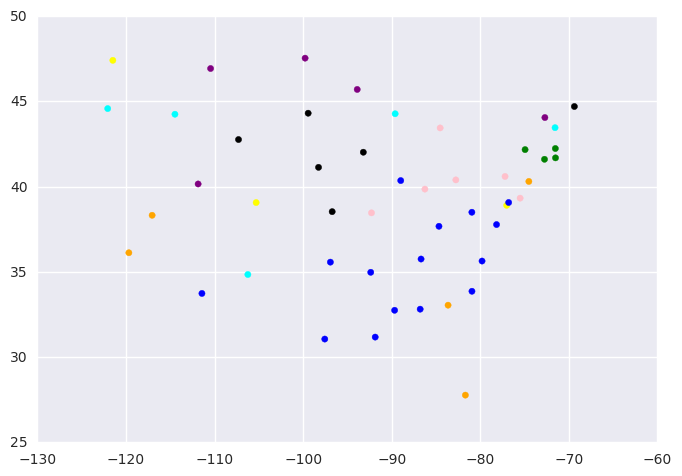

In [177]:
matplotlib.pyplot.scatter(data2015['long'],data2015['lat'],color =color_by_cluster)

In [175]:
def bed_colours(x):
    if x >= 35: return 'purple'
    if (x >=30) & (x < 35): return 'red'
    if (x >=25) & (x < 30): return 'orange'
    if (x >=20) & (x < 25): return 'Yellow'
    if (x >=15) & (x < 20): return 'green'
    if (x >=10) & (x < 16): return 'cyan'
    return 'pink'

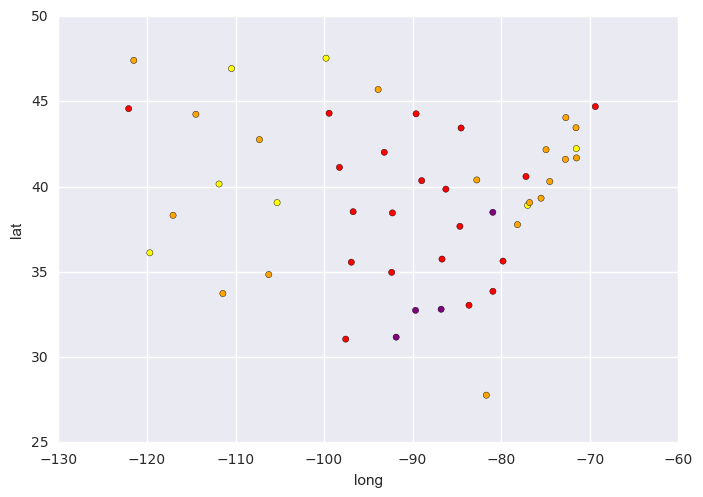

In [171]:
data2015.plot.scatter(x='long', y='lat',c = data2015.obesity_rate.map(bed_colours))
#data2015.plot.scatter(x='long', y='lat',c = data2015.obesity_rate, colormap = matplotlib.pyplot.cm.YlOrRd)

<h4>Conclusion</h4>
- the number of McDonalds in each location doesn't necessary have a hugh contribution to the obesity rate, diabete rate, or hypertension rate
- Physical inactivte will definitely cause hypertension and obesity
- Somehow I don't know why, my data show the less vegetable consumption, the healthier you are.  